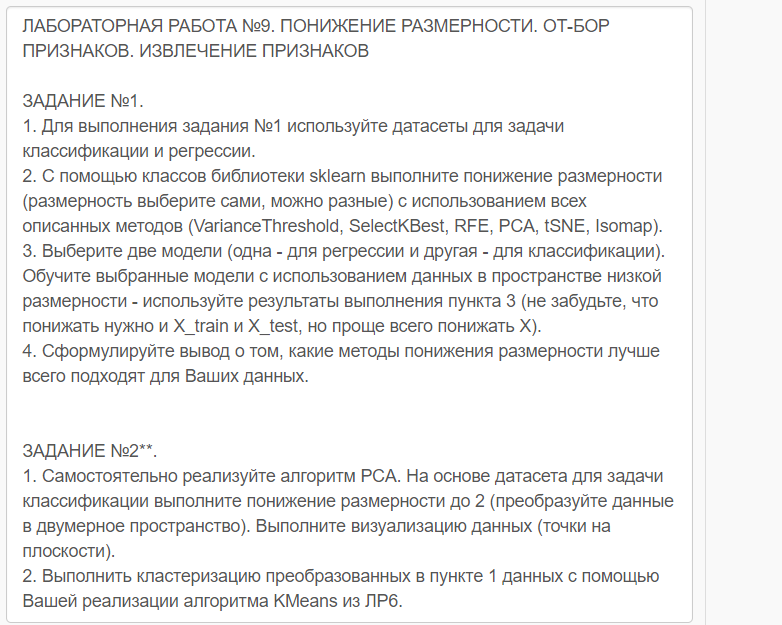

# Задание 1

## 2, 3 Понижение размерности и тестирование на моделях

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
from sklearn.ensemble import GradientBoostingRegressor, StackingClassifier
from sklearn.metrics import classification_report, mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

Для регрессии будем использовать градиентный бустинг, а для классификации - стекинг (гиперпараметры взяты из 5-ой лабы)

In [2]:
def test_reg(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    gbr = GradientBoostingRegressor(max_depth=5).fit(x_train, y_train)
    y_pred = gbr.predict(x_test)

    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'R^2: {r2_score(y_test, y_pred)}')


def test_class(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    estimators = [
        ("dt", DecisionTreeClassifier(max_depth=7, max_features=20)),
        ("logreg", LogisticRegression(max_iter=800)),
        ("bayes", GaussianNB()),
        ("knn", KNeighborsClassifier(n_neighbors=80)),
    ]

    sc = StackingClassifier(estimators, final_estimator=DecisionTreeClassifier(max_depth=5)).fit(x_train, y_train)
    y_pred_diab = sc.predict(x_test)
    print(classification_report(y_test, y_pred_diab))

In [3]:
from sklearn.preprocessing import MinMaxScaler

df_cars = pd.read_csv(r"../data/prepared_cars.csv").drop("Unnamed: 0", axis=1)
y_cars = df_cars["price_usd"]
x_cars = pd.DataFrame(MinMaxScaler().fit_transform(df_cars.drop("price_usd", axis=1)))

test_reg(x_cars, y_cars)

MSE: 3852265.9273305046
R^2: 0.9071317754522243


In [4]:
df_diab = pd.read_csv(r"../data/prepared_dfdiab.csv").drop("Unnamed: 0", axis=1)
y_diab = df_diab["Diabetes_012"]
x_diab = df_diab.drop("Diabetes_012", axis=1)

test_class(x_diab, y_diab)

              precision    recall  f1-score   support

         0.0       0.60      0.63      0.61      1374
         1.0       0.40      0.29      0.34      1421
         2.0       0.49      0.60      0.54      1373

    accuracy                           0.50      4168
   macro avg       0.50      0.51      0.50      4168
weighted avg       0.49      0.50      0.49      4168



In [5]:
x_cars.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
count,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,0.248865,0.791477,0.256828,0.101754,0.008229,0.036101,0.429472,0.546703,0.521684,0.601879,0.552931,0.522151,0.058395,0.354079,0.578417,0.468739,0.499753,0.489035,0.612546,0.446939,0.432016,0.482521,0.530378,0.665257,0.334743,0.205601,0.397939,0.336041,0.450494,0.006410,0.369287,0.958683,0.334380,0.665879,0.043497,0.342192,0.619735,0.535750,0.020970,0.990397,0.860190,0.279904,0.212037,0.223612,0.784511,0.034959,0.011653,0.352599,0.228543,0.607199,0.223820,0.275804,0.241468,0.356077,0.170979,0.263736,0.415328,0.579404
std,0.136072,0.104750,0.083988,0.071685,0.023273,0.050550,0.495007,0.497821,0.499536,0.489517,0.497197,0.499516,0.234491,0.478239,0.493819,0.499028,0.500006,0.499886,0.487175,0.497183,0.495363,0.499701,0.499083,0.471907,0.471907,0.404145,0.489479,0.472359,0.497550,0.079809,0.482618,0.199026,0.471779,0.471688,0.203977,0.474450,0.485458,0.498727,0.143286,0.097523,0.346794,0.448958,0.408756,0.416670,0.411166,0.183678,0.107319,0.477785,0.419900,0.488379,0.416808,0.446924,0.427979,0.478845,0.376496,0.440663,0.492785,0.493661
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158000,0.727273,0.200000,0.047059,0.000538,0.010305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.250000,0.792208,0.250000,0.082353,0.002151,0.026434,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.325000,0.870130,0.287500,0.129412,0.008065,0.040771,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000

In [6]:
x_diab.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000
mean,0.585763,0.558987,0.977543,0.206042,0.478586,0.061758,0.148276,0.693659,0.608076,0.783488,0.042036,0.948031,0.107464,0.469949,0.132362,0.198762,0.262074,0.448355,0.644743,0.776391,0.652034
std,0.492608,0.496526,0.148171,0.085396,0.499559,0.240724,0.355386,0.460990,0.488197,0.411882,0.200678,0.221972,0.309714,0.271509,0.278234,0.336755,0.439779,0.497344,0.232658,0.208890,0.314857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.156627,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.500000,0.600000,0.428571
50%,1.000000,1.000000,1.000000,0.192771,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.666667,0.800000,0.714286
75%,1.000000,1.000000,1.000000,0.240964,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.750000,0.100000,0.233333,1.000000,1.000000,0.833333,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### VarianceThreshold

In [7]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE, f_regression

In [8]:
vt = VarianceThreshold(0.23)

x_cars_vt = pd.DataFrame(vt.fit_transform(x_cars))

x_cars_vt.shape

(38531, 23)

In [9]:
test_reg(x_cars_vt, y_cars)

MSE: 19732421.387151904
R^2: 0.526012760251475


Понижение размерности в данном случае убило модель, так как оно откидывает такой важный признак, как пробег авто

In [10]:
vt = VarianceThreshold(0.2)

x_diab_vt = pd.DataFrame(vt.fit_transform(x_diab))

x_diab_vt.shape

(13893, 6)

In [11]:
test_class(x_diab_vt, y_diab)

              precision    recall  f1-score   support

         0.0       0.52      0.56      0.54      1424
         1.0       0.37      0.17      0.23      1395
         2.0       0.42      0.63      0.50      1349

    accuracy                           0.45      4168
   macro avg       0.44      0.45      0.42      4168
weighted avg       0.44      0.45      0.42      4168



С классификацией получилось довольно неплохо, точность 1 и 3 классов практически не пострадала, а у 2 заметно снизилась, при этом размерность была снижена на 15!

### SelectKBest

In [12]:
skb = SelectKBest(f_regression, k=10)
x_cars_skb = skb.fit_transform(x_cars, y_cars)

test_reg(x_cars_skb, y_cars)

MSE: 8647167.361281546
R^2: 0.7829136592042426


Понизили размерность на 48, а R2 на 0.11

In [13]:
skb = SelectKBest(k=5)
x_diab_skb = skb.fit_transform(x_diab, y_diab)

test_class(x_diab_skb, y_diab)

              precision    recall  f1-score   support

         0.0       0.63      0.61      0.62      1378
         1.0       0.40      0.44      0.42      1372
         2.0       0.53      0.49      0.51      1418

    accuracy                           0.51      4168
   macro avg       0.52      0.51      0.52      4168
weighted avg       0.52      0.51      0.52      4168



Понизили размерность на 16 и даже немного прибавили в точности, крутотень!

### RFE

In [14]:
gbr = GradientBoostingRegressor()

rfe = RFE(estimator=gbr, n_features_to_select=5, step=5)  # step=5 - на каждой итерации будет удаляться 5 признаков
x_cars_rfe = rfe.fit_transform(x_cars, y_cars)

In [15]:
test_reg(x_cars_rfe, y_cars)

MSE: 6077265.321276892
R^2: 0.8538986691236425


Прекрасно, снизили размерность на 53, а потеря в точности составила 0.05

In [16]:
estimators = [
    ("dt", DecisionTreeClassifier(max_depth=7, max_features=20)),
    ("logreg", LogisticRegression(max_iter=800)),
    ("bayes", GaussianNB()),
    ("knn", KNeighborsClassifier(n_neighbors=80)),
]

sc = StackingClassifier(estimators, final_estimator=DecisionTreeClassifier(max_depth=5))

rfe = RFE(estimator=gbr, n_features_to_select=5, step=1)  # step=1 - на каждой итерации будет удаляться один признак
x_diab_rfe = rfe.fit_transform(x_diab, y_diab)

In [17]:
test_class(x_diab_rfe, y_diab)

              precision    recall  f1-score   support

         0.0       0.62      0.59      0.60      1351
         1.0       0.39      0.37      0.38      1401
         2.0       0.51      0.56      0.54      1416

    accuracy                           0.51      4168
   macro avg       0.51      0.51      0.51      4168
weighted avg       0.50      0.51      0.50      4168



Снизили размерность на 16, получили прибавку в точности в пределах погрешности.

### PCA

In [18]:
x_cars

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.190000,0.883117,0.3125,0.094118,0.006452,0.007168,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.290000,0.779221,0.3750,0.129412,0.028495,0.037186,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.402000,0.766234,0.3125,0.035294,0.038172,0.067652,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.010000,0.740260,0.3750,0.094118,0.022043,0.038530,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.280000,0.766234,0.3125,0.152941,0.003226,0.003136,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,0.290000,0.753247,0.4375,0.047059,0.045161,0.134857,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
38527,0.321000,0.805195,0.2750,0.035294,0.010215,0.142025,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
38528,0.777957,0.753247,0.4375,0.023529,0.033333,0.165323,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
38529,0.020000,0.766234,0.2500,0.070588,0.083333,0.219534,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
from sklearn.decomposition import PCA
import pickle

pca = PCA(n_components=2).fit(x_cars)
x_cars_pca = pca.transform(x_cars)

with open(r"../models/2_pca.pickle", "wb") as f:
    pickle.dump(pca, f, pickle.HIGHEST_PROTOCOL)

In [20]:
test_reg(x_cars_pca, y_cars)

MSE: 23375910.443026178
R^2: 0.44681581341224663


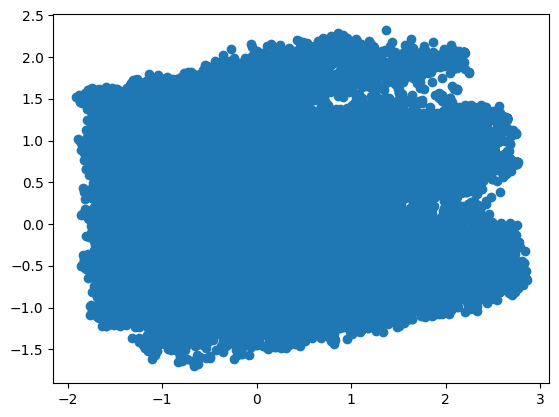

In [21]:
import matplotlib.pyplot as plt

plt.scatter(x_cars_pca[:, 0], x_cars_pca[:, 1])

Размерность уменьшена в 29 раз, но сильно пострадала точность (при размерности 10 не намного лучше) 

In [22]:
x_diab_pca = PCA(n_components=2).fit_transform(x_diab, y_diab)

test_class(x_diab_pca, y_diab)

              precision    recall  f1-score   support

         0.0       0.52      0.59      0.55      1404
         1.0       0.39      0.28      0.33      1414
         2.0       0.46      0.53      0.49      1350

    accuracy                           0.47      4168
   macro avg       0.46      0.47      0.46      4168
weighted avg       0.46      0.47      0.46      4168



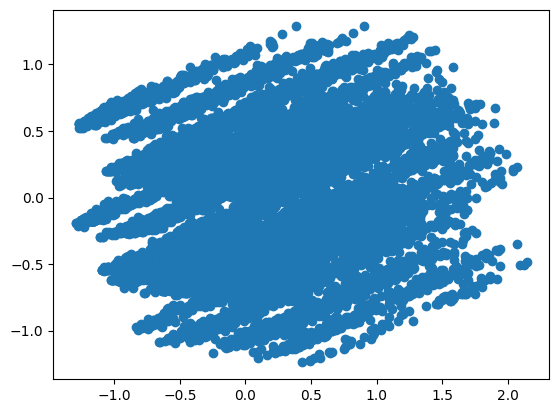

In [23]:
plt.scatter(x_diab_pca[:, 0], x_diab_pca[:, 1])

В случае классификации значительной потери точности не наблюдается, размерность была снижена в 10 раз

### T-SNE

In [24]:
from sklearn.manifold import TSNE, Isomap

x_cars_tsne = TSNE(n_components=2).fit_transform(x_cars)
test_reg(x_cars_tsne, y_cars)

MSE: 20891029.17339033
R^2: 0.496906279978113


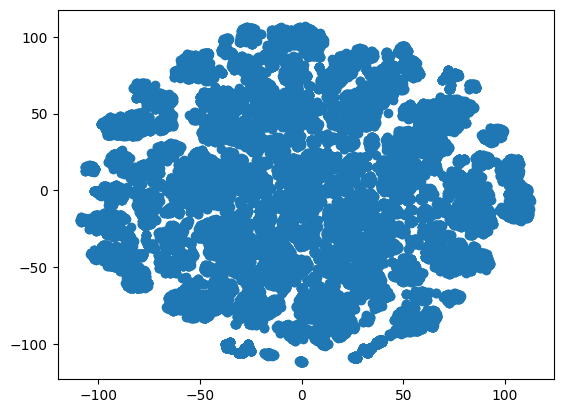

In [25]:
plt.scatter(x_cars_tsne[:, 0], x_cars_tsne[:, 1])

Обучался 4 минуты и сильно снизил точность, мне не понравилось.

In [26]:
x_diab_tsne = TSNE(n_components=2).fit_transform(x_diab)
test_class(x_diab_tsne, y_diab)

              precision    recall  f1-score   support

         0.0       0.59      0.46      0.51      1402
         1.0       0.35      0.29      0.32      1433
         2.0       0.43      0.61      0.51      1333

    accuracy                           0.45      4168
   macro avg       0.46      0.45      0.45      4168
weighted avg       0.46      0.45      0.44      4168



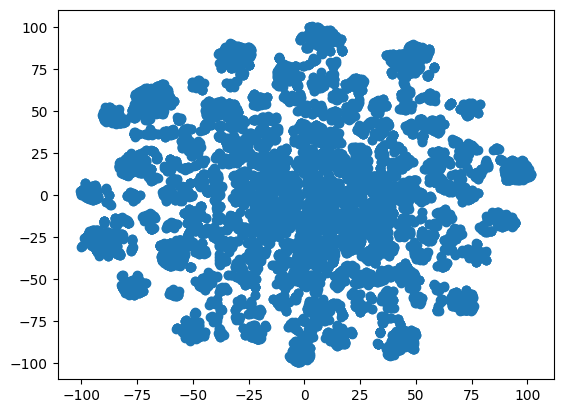

In [27]:
plt.scatter(x_diab_tsne[:, 0], x_diab_tsne[:, 1])

Прикольно, алгоритм стянул соседние точки и немного отдалил дальние. Имеется заметная потеря точности.

### Isomap

In [28]:
x_cars_isomap = Isomap(n_components=5).fit_transform(x_cars.loc[:5000])

test_reg(x_cars_isomap, y_cars.loc[:5000])

MSE: 13330615.202492924
R^2: 0.5122062702894872


Isomap на регрессии сильно портит точность. Если добавить компонент, становится похуже.

In [29]:
x_diab_isomap = Isomap(n_components=2).fit_transform(x_diab, y_diab)

test_class(x_diab_isomap, y_diab)

              precision    recall  f1-score   support

         0.0       0.52      0.54      0.53      1434
         1.0       0.33      0.29      0.31      1375
         2.0       0.44      0.48      0.46      1359

    accuracy                           0.44      4168
   macro avg       0.43      0.44      0.43      4168
weighted avg       0.43      0.44      0.43      4168



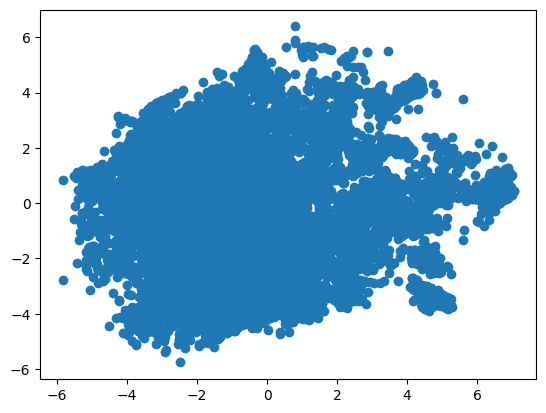

In [30]:
plt.scatter(x_diab_isomap[:, 0], x_diab_isomap[:, 1])

Здесь можно наблюдать значительную потерю точности.

## Вывод

В случае регрессии и градиентного бустинга лучше всего подошёл RFE (он позволил снизить размерность на 53 или почти в 12 раз и получить потерю в точности ~0,05).

В случае классификации и стекинга лучше всего подошёл SelectKBest (размерность снижена на 16 или в 4 раза и потери точности не произошло совсем).

# Задание 2

## PCA руками

In [31]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from typing import List, Tuple

class PCA_Hype():
    def __init__(self, k_components: int) -> None:
        self._k_components = k_components


    def fit_transform(self, x: pd.DataFrame) -> pd.DataFrame:
        scaled_x = np.array(self._scale(x))
        cov_matrix = self._get_cov_matrix(x, x.shape[1])
        k_eigen_pairs = self._get_first_k_eigen_pairs(cov_matrix)
        matrix_from_eigen_vectors = self._get_matrix_from_eigen_pairs(k_eigen_pairs)
        return pd.DataFrame(scaled_x.dot(matrix_from_eigen_vectors))


    def _get_cov_matrix(self, x: pd.DataFrame, size: int) -> np.ndarray:
        matrix = [
            [ round(self._get_cov(x.iloc[:, i], x.iloc[:, j]), 4) for j in range(size) ] for i in range(size)
        ]
        return np.array(matrix)


    def _scale(self, x: pd.DataFrame) -> np.ndarray:
        return StandardScaler().fit_transform(x)


    def _get_cov(self, v1, v2) -> float:
        v1, v2 = np.array(v1), np.array(v2)

        av_1, av_2 = np.average(v1), np.average(v2)

        v1 -= av_1
        v2 -= av_2

        return float(np.average(v1 * v2))
    

    def _get_first_k_eigen_pairs(self, matrix: np.ndarray) -> List[Tuple]:
        eigen = np.linalg.eig(matrix)

        eigen_values = eigen[0]
        eigen_vectors = eigen[1]

        eigen_pairs = [(eigen_values[i], eigen_vectors[i]) for i in range(eigen_values.__len__())]
        return sorted(eigen_pairs, key=lambda pair: pair[0], reverse=True)[:self._k_components]
       
        
    def _get_matrix_from_eigen_pairs(self, pairs: List[Tuple]) -> np.ndarray:
        vectors = [pair[1] for pair in pairs]
        return np.stack(vectors, axis=1)

In [32]:
x_cars_pca_hype = PCA_Hype(k_components=10).fit_transform(x_cars)
x_cars_pca_hype

,0,1,2,3,4,5,6,7,8,9
0,0.527949,1.855786,1.053892,-0.134900,-0.780674,1.842752,1.026191,-0.088002,0.686776,-1.633305
1,-0.068134,-0.488483,-0.535196,-1.358739,-1.544641,0.036559,0.424002,0.237965,1.096100,-1.922790
2,0.065768,-0.659393,-0.460850,-1.474631,0.490977,-0.701912,0.839655,-0.394808,0.625244,-1.430648
3,-0.388260,-2.499458,0.848461,0.055746,0.624100,-0.583967,0.510188,-0.195672,1.793193,-0.127363
4,-2.059474,0.457003,-0.996617,-1.193431,1.146633,1.469765,-1.417378,0.806308,0.491266,-1.759774
...,...,...,...,...,...,...,...,...,...,...
38526,0.276763,-0.613043,-0.479517,-1.402882,-1.545197,0.045800,0.140217,1.990058,-0.229363,-3.008110
38527,0.361337,-0.592173,-0.556637,-1.417533,-1.546777,0.036422,0.169205,1.234489,-1.625665,0.328581
38528,0.573503,0.512447,-0.659971,0.361169,-1.566978,-0.134956,0.527253,1.733785,-0.478452,-2.662145
38529,0.376529,-0.646000,-0.745715,-1.533468,0.472036,-0.718181,-0.560213,1.758474,-1.577503,-0.486924


In [33]:
test_reg(x_cars_pca_hype, y_cars)

MSE: 18103733.279316742
R^2: 0.5677743851001054


PCA_Hype работает хайпово

Теперь для классификации

In [34]:
x_diab_pca_hype = PCA_Hype(k_components=2).fit_transform(x_diab)
x_diab_pca_hype

,0,1
0,0.490784,-0.387452
1,0.911677,-0.320716
2,1.023869,-0.153481
3,0.269728,0.336922
4,0.761970,-0.661656
...,...,...
13888,0.559631,-0.516843
13889,-0.444119,0.021946
13890,0.165563,-0.148157
13891,0.287637,0.454200


In [35]:
test_class(x_diab_pca_hype, y_diab)

              precision    recall  f1-score   support

         0.0       0.52      0.49      0.51      1405
         1.0       0.37      0.37      0.37      1388
         2.0       0.44      0.47      0.46      1375

    accuracy                           0.44      4168
   macro avg       0.44      0.44      0.44      4168
weighted avg       0.44      0.44      0.44      4168



Тут вообще песня

## Кластеризовать с помощью своей реализации KMeans

In [36]:
from numpy.typing import NDArray
from math import sqrt

def euclid(point1: NDArray, point2: NDArray) -> float:
    return sqrt(np.sum((point1 - point2) ** 2))

def get_centroid(cluster: NDArray) -> NDArray:
    number_of_points = cluster.shape[0]
    coordinates = []

    for j in range(cluster.shape[1]):  # можно транспонировать и итерироваться мапом по строкам
        coordinates.append(np.sum(cluster[:, j]) / number_of_points)

    return np.array(coordinates)



class Kmeans:
    def __init__(self, n_clusters: int, iter: int, data: NDArray) -> None:
        self._n_clusters = n_clusters
        self._iter = iter
        self._data = data
        self._centroids = np.random.rand(n_clusters, data.shape[1])  # (кол-во кластеров) х (кол-во признаков)
        self._clusters = []

        for _ in range(n_clusters):
            self._clusters.append([])


    def fit(self) -> None:
        for _ in range(self._iter):
            for point in self._data:  # считаем расстояния до каждого центроида и кидаем точку в нужный кластер
                distances = []
                for centroid in self._centroids:
                    distances.append(euclid(point, centroid))
                cluster_number = np.argmin(distances)
                self._clusters[cluster_number].append(point)

            for index, cluster in enumerate(self._clusters):  # пересчитываем центроиды
                centroid = get_centroid(np.array(cluster))
                self._centroids[index] = centroid

In [37]:
kmeans = Kmeans(n_clusters=3, iter=100, data=np.array(x_diab_pca_hype))
kmeans.fit()

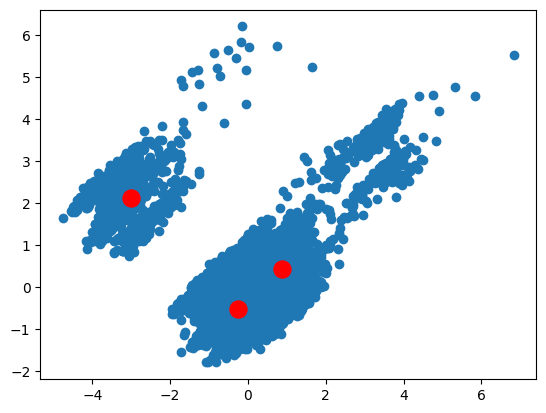

In [38]:
import matplotlib.pyplot as plt

plt.scatter(x_diab_pca_hype.iloc[:, 0], x_diab_pca_hype.iloc[:, 1])
plt.scatter(kmeans._centroids[:, 0], kmeans._centroids[:, 1], s=150, c="r")

Ну, в целом, со своей задачей алгоритм справился